# BANK APP REVIEWS - DASHEN

In [135]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 🧱 1. Setup & Imports

In [136]:
import warnings
import pandas as pd
from data.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data
from visualization.visualizer import ReviewVisualizer

In [137]:
warnings.filterwarnings("ignore")

In [138]:
# variable
BANK="Dashen"

In [139]:
#paths
RAW_DATA_PATH='../../data/raw/'+BANK+'_raw_reviews.csv'
CLEANED_DATA_PATH='../../data/interim/'+BANK+'_cleaned_reviews.csv'

### 📌 Project Overview

#### CBE APP Reviews


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [140]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/customer-experience-analytics-for-fintech-apps/data/raw/Dashen_raw_reviews.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (500, 10)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,6ece1f5e-55f2-404d-b980-1cb45823180f,Masersha,https://play-lh.googleusercontent.com/a/ACg8oc...,መቸሸጠ,5,0,1.0.16,2025-06-03 19:40:31,NaN,NaN
1,765ff69f-5274-45c5-985b-81b8d01e1874,Koki Mulugeta,https://play-lh.googleusercontent.com/a/ACg8oc...,wow,5,0,NaN,2025-06-03 17:30:11,NaN,NaN
2,7db66b6a-a044-43f1-a7ad-ea8a10815548,Badhasa Dassaalany,https://play-lh.googleusercontent.com/a/ACg8oc...,gadaa,5,0,1.0.16,2025-06-01 17:10:53,NaN,NaN
3,caf4a80c-85db-4b49-ab9c-a0b55e152317,Nebiyu Getachew Mamo,https://play-lh.googleusercontent.com/a-/ALV-U...,Massive upgrade from the Amole app.,5,0,1.0.16,2025-05-31 23:04:04,NaN,NaN
4,2c5df026-16eb-4d6b-a044-acf4103d1c36,Mudin said,https://play-lh.googleusercontent.com/a-/ALV-U...,good,4,0,1.0.16,2025-05-31 22:39:35,NaN,NaN


### Dataset Overview

In [141]:
#view sample data
df.sample(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
443,499d89e8-8b7e-4641-b477-29ab5a5d314a,TESFA Dagne,https://play-lh.googleusercontent.com/a/ACg8oc...,its my choice,5,0,1.0.16,2025-05-15 21:15:44,NaN,NaN
195,43c462b0-3873-429a-ac91-ee72fbf4e070,Kibru Awonchifew,https://play-lh.googleusercontent.com/a-/ALV-U...,I have been using the Dashen Supper app mobile...,5,68,1.0.15,2025-04-21 12:08:17,NaN,NaN
9,32df6869-1c15-4cfe-8431-0ec332afea89,TAMRU DAMTIE,https://play-lh.googleusercontent.com/a-/ALV-U...,good,5,0,NaN,2025-05-30 11:13:17,NaN,NaN
295,4041a84a-1399-4b47-86dd-a7f048978f43,firaol fekade,https://play-lh.googleusercontent.com/a-/ALV-U...,execellent,5,1,1.0.14,2025-04-24 09:23:20,NaN,NaN
282,9f0dddc5-58fa-4637-9a98-414044aa8bd0,Yared Mulate,https://play-lh.googleusercontent.com/a/ACg8oc...,Its slow when i try to see the Recent Transact...,1,1,1.0.15,2025-04-28 10:11:58,NaN,NaN
110,872c07eb-b111-4701-b263-c11d17dea1c7,Hailemichael Tsega,https://play-lh.googleusercontent.com/a/ACg8oc...,i love this app esp 3 click that make e-commer...,5,3,NaN,2025-04-22 13:24:34,NaN,NaN
373,427aa626-93a9-4faf-899a-d519952b4baa,Gizachew Mamo,https://play-lh.googleusercontent.com/a/ACg8oc...,it's a hestorical app. in the bank industry.,5,2,1.0.14,2025-04-21 14:07:42,NaN,NaN
24,46d39a4d-52de-4a73-9146-654d971ffb71,Derso Marye,https://play-lh.googleusercontent.com/a/ACg8oc...,it is good but some times says duplicate trans...,5,0,1.0.16,2025-05-24 08:07:56,NaN,NaN
102,7b265fe3-1e03-425b-9b06-41bafe966fc3,Esmail Kemal,https://play-lh.googleusercontent.com/a-/ALV-U...,"It's an amazing app, experience it!!",5,2,1.0.15,2025-04-23 10:41:16,NaN,NaN
462,8d1d472b-2bae-4749-b089-5632108ade02,natnael abera,https://play-lh.googleusercontent.com/a/ACg8oc...,its the best ever,5,1,1.0.16,2025-05-09 00:18:26,NaN,NaN


In [142]:
#see the last rows
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
495,4041a84a-1399-4b47-86dd-a7f048978f43,firaol fekade,https://play-lh.googleusercontent.com/a-/ALV-U...,execellent,5,1,1.0.14,2025-04-24 09:23:20,NaN,NaN
496,1115d2b9-b1f0-4fe5-a92c-67aed49141a7,Tadiwos Laekemariam,https://play-lh.googleusercontent.com/a/ACg8oc...,"This super app is a total game-changer—fast, r...",5,4,1.0.15,2025-04-23 21:09:47,NaN,NaN
497,99705962-8067-497e-a116-cd6599ca4bb8,Shumbulo Dafursa,https://play-lh.googleusercontent.com/a/ACg8oc...,All in One ✍️secure ✍️reliable ✍️convenient. D...,5,1,1.0.15,2025-04-23 20:44:20,NaN,NaN
498,2d86848c-b71b-4419-871c-42ad60f1abfe,Desalegn Belachew,https://play-lh.googleusercontent.com/a/ACg8oc...,it is incredible product.,5,1,1.0.15,2025-04-23 16:09:24,NaN,NaN
499,e887c287-a3a3-42dc-bd9a-7508531f6f0c,Hermela Asnake,https://play-lh.googleusercontent.com/a-/ALV-U...,I'm really impressed with this app! It’s user-...,5,5,1.0.15,2025-04-23 16:01:37,NaN,NaN


In [143]:
#shape of the dataset
df.shape

(500, 10)

In [144]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [145]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,500.0,4.610,1.048857,1.0,5.0,5.0,5.0,5.0
thumbsUpCount,500.0,4.746,19.807326,0.0,1.0,1.0,2.0,209.0
replyContent,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
repliedAt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
reviewId,500,200,6ece1f5e-55f2-404d-b980-1cb45823180f,3
userName,500,200,Masersha,3
userImage,500,200,https://play-lh.googleusercontent.com/a/ACg8oc...,3
content,500,187,good,21
reviewCreatedVersion,360,4,1.0.15,172
at,500,200,2025-06-03 19:40:31,3


In [147]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              500 non-null    object 
 1   userName              500 non-null    object 
 2   userImage             500 non-null    object 
 3   content               500 non-null    object 
 4   score                 500 non-null    int64  
 5   thumbsUpCount         500 non-null    int64  
 6   reviewCreatedVersion  360 non-null    object 
 7   at                    500 non-null    object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
dtypes: float64(2), int64(2), object(6)
memory usage: 39.2+ KB


In [148]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

reviewId                200
userName                200
userImage               200
at                      200
content                 187
thumbsUpCount            19
score                     5
reviewCreatedVersion      4
replyContent              0
repliedAt                 0
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [149]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [150]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
replyContent,500,100.00%
repliedAt,500,100.00%
reviewCreatedVersion,140,28.00%
reviewId,0,0.00%
userName,0,0.00%
userImage,0,0.00%
content,0,0.00%
score,0,0.00%
thumbsUpCount,0,0.00%
at,0,0.00%


### Missing Values

In [151]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,500,100.00%
repliedAt,500,100.00%
reviewCreatedVersion,140,28.00%


### Duplicates

In [152]:
#count duplicates
dq.count_duplicates()

300

In [153]:
#look at the duplicates
dq.display_duplicates().sample(10)

[INFO] Found 300 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
262,8d1d472b-2bae-4749-b089-5632108ade02,natnael abera,https://play-lh.googleusercontent.com/a/ACg8oc...,its the best ever,5,1,1.0.16,2025-05-09 00:18:26,NaN,NaN
335,8cd152ac-79ad-4248-8a85-574943011aa6,Beamlak Gyes,https://play-lh.googleusercontent.com/a-/ALV-U...,"This app has everything I was looking for, das...",5,2,1.0.15,2025-04-21 20:34:23,NaN,NaN
298,2d86848c-b71b-4419-871c-42ad60f1abfe,Desalegn Belachew,https://play-lh.googleusercontent.com/a/ACg8oc...,it is incredible product.,5,1,1.0.15,2025-04-23 16:09:24,NaN,NaN
450,b34cbb10-24ea-4091-93b3-41cd5f5506ec,Agidew Shewalem,https://play-lh.googleusercontent.com/a-/ALV-U...,Totally amazing,5,3,1.0.16,2025-05-13 19:46:18,NaN,NaN
207,5e6ff839-abc2-4b30-a8b4-e0f331da29d1,abduljelil alemar,https://play-lh.googleusercontent.com/a/ACg8oc...,this app better than Amole . but the biometric...,4,0,1.0.16,2025-05-31 12:24:07,NaN,NaN
315,cdbc2de4-065b-4230-a34b-c532cf84ae71,ASEDESACH ASFAW,https://play-lh.googleusercontent.com/a/ACg8oc...,"The app has various usefull functions, which m...",5,5,1.0.15,2025-04-22 09:22:10,NaN,NaN
436,d3ab193b-503c-4530-8148-cf50387c8b26,Katamaa Habtamuu,https://play-lh.googleusercontent.com/a/ACg8oc...,wowwwe app,5,0,NaN,2025-05-17 11:30:07,NaN,NaN
479,17d46982-18ec-43a9-85f3-0ff927671f95,Hailu Regasa,https://play-lh.googleusercontent.com/a/ACg8oc...,best of best,5,1,NaN,2025-04-29 10:37:26,NaN,NaN
325,9b5d99cc-8b0e-46d5-a846-ece397be1d99,Asefa,https://play-lh.googleusercontent.com/a/ACg8oc...,Assefa Genetu = Dashen superup is the latest a...,5,2,1.0.15,2025-04-22 06:14:51,NaN,NaN
413,cc215b00-332a-4b1d-93d1-4fad5592f40c,Kafala Hayile,https://play-lh.googleusercontent.com/a/ACg8oc...,real life changer,5,0,NaN,2025-05-28 12:01:56,NaN,NaN


### Invalid Values

In [154]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [155]:
#saving the original dataset for later use
df_original=df.copy()

In [156]:
#drop duplicated rows
dq.drop_duplicates().sample(5)

[INFO] Dropped 300 duplicate row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
53,be71f8b9-5329-4235-8c92-9be8be76e5cb,Busho Adelo,https://play-lh.googleusercontent.com/a-/ALV-U...,Good,4,1,1.0.16,2025-05-13 11:42:22,NaN,NaN
13,cc215b00-332a-4b1d-93d1-4fad5592f40c,Kafala Hayile,https://play-lh.googleusercontent.com/a/ACg8oc...,real life changer,5,0,NaN,2025-05-28 12:01:56,NaN,NaN
38,c0dbb81a-2d73-4409-ba41-2287a340b4d9,Melaku Temesgen,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,0,1.0.16,2025-05-16 21:56:27,NaN,NaN
31,add25431-5b8a-4878-b820-2cc1c06926f1,Musa Akmel,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,0,NaN,2025-05-20 09:42:35,NaN,NaN
95,4041a84a-1399-4b47-86dd-a7f048978f43,firaol fekade,https://play-lh.googleusercontent.com/a-/ALV-U...,execellent,5,1,1.0.14,2025-04-24 09:23:20,NaN,NaN


In [157]:
# Check for duplicates again after dropping
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


In [158]:
# Drop rows missing significant columns
dq.drop_rows_with_missing_in_columns(['content','score']).sample(5)

[INFO] Dropped 0 row(s) with missing values in columns: ['content', 'score']


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
125,9b5d99cc-8b0e-46d5-a846-ece397be1d99,Asefa,https://play-lh.googleusercontent.com/a/ACg8oc...,Assefa Genetu = Dashen superup is the latest a...,5,2,1.0.15,2025-04-22 06:14:51,NaN,NaN
14,74cf1402-3df8-4a1f-9303-fb7d5c5ae7dc,Gosa Efa,https://play-lh.googleusercontent.com/a-/ALV-U...,👍👍👍,5,0,1.0.16,2025-05-28 11:47:32,NaN,NaN
33,a36489c7-0091-4e07-897f-78168bcb64b4,Henok Gezmu,https://play-lh.googleusercontent.com/a/ACg8oc...,The best app ever in finance sector,5,0,1.0.16,2025-05-18 22:01:50,NaN,NaN
134,5145d0cf-0bf3-4b48-9c11-46819cd06bcd,Kidus Y,https://play-lh.googleusercontent.com/a-/ALV-U...,One of the best digital platforms I’ve used! F...,5,4,1.0.15,2025-04-21 20:34:53,NaN,NaN
41,a3e55437-92a6-4f5f-a9d5-45e561a077b0,Alemseged Adila,https://play-lh.googleusercontent.com/a-/ALV-U...,Fantastic,5,0,1.0.16,2025-05-16 10:07:49,NaN,NaN


In [159]:
#drop columns with no data
df=dq.drop_empty_columns()

[INFO] Dropping 2 empty column(s): ['replyContent', 'repliedAt']


In [160]:
#drop the reviewid column - it is not useful for analysis
df = dq.drop_columns(['reviewId','userImage','reviewCreatedVersion'])

[INFO] Dropped columns: ['reviewId', 'userImage', 'reviewCreatedVersion']


In [161]:
dq.find_invalid_values()

{}

In [162]:
df=dq.replace_emojis_with_text("content")

[INFO] Replaced emojis with text equivalents in 'content' column.


In [163]:
df=await dq.translate_non_english_text("content")

INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=pl&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=wow "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=it&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=nice+application "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=pl&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=wow "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=fr&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=best+app "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET h

In [164]:
df.shape

(200, 5)

### Inconsistencies and Inaccuracies

In [165]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [166]:
df=dq.convert_columns_to_datetime()

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       200 non-null    object
 1   content        200 non-null    object
 2   score          200 non-null    int64 
 3   thumbsUpCount  200 non-null    int64 
 4   at             200 non-null    object
dtypes: int64(2), object(3)
memory usage: 9.4+ KB


In [168]:
df.columns

Index(['userName', 'content', 'score', 'thumbsUpCount', 'at'], dtype='object')

In [169]:
#  df=df.rename(columns={"content": "review", "score": "rating", "at": "date"}, inplace=True)
df=dq.rename_and_prioritize_columns({"content": "review", "score": "rating", "at": "date"})

[INFO] Renamed columns: {'content': 'review', 'score': 'rating', 'at': 'date'}


In [170]:
df["bank"] = BANK  # add bank name column
df["source"] = "Google Store"  # add source column

In [171]:
df.sample(10)

,review,rating,date,userName,thumbsUpCount,bank,source
56,"To be honest, best banking and lifestyle app i...",5,2025-05-12 16:03:18,Rohobot Worku,1,Dashen,Google Store
8,Wow,5,2025-05-30 11:16:47,Sayid Qofee,0,Dashen,Google Store
124,Dashen bank is my number one choice,5,2025-04-22 08:04:41,Chaltu Tesfaye,2,Dashen,Google Store
193,very comfortable app keep it,5,2025-04-21 12:28:51,Habtemariam Yilma,2,Dashen,Google Store
79,best of best,5,2025-04-29 10:37:26,Hailu Regasa,1,Dashen,Google Store
153,The new e-commerce feature is incredibly amazi...,5,2025-04-21 15:41:06,Bati Sileshi,3,Dashen,Google Store
118,Convent!,5,2025-04-22 08:52:38,Abeselom mulugeta,2,Dashen,Google Store
68,yes i want dashen super open,5,2025-05-02 23:55:12,Nesru “Nesrudin” Dendir,2,Dashen,Google Store
197,The new mobile banking application is a major ...,5,2025-04-21 11:52:02,Kalkidan Befekadu,179,Dashen,Google Store
100,Best app,5,2025-04-23 13:36:19,Mudana Waji,2,Dashen,Google Store


### Export Cleaned Data

In [172]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

## 6. Analyze & Visualize

In [173]:
#instantiate the ReviewVisualizer class
viz = ReviewVisualizer(df)

[INFO] Saved plot: plots/wordcloud_reviews.png


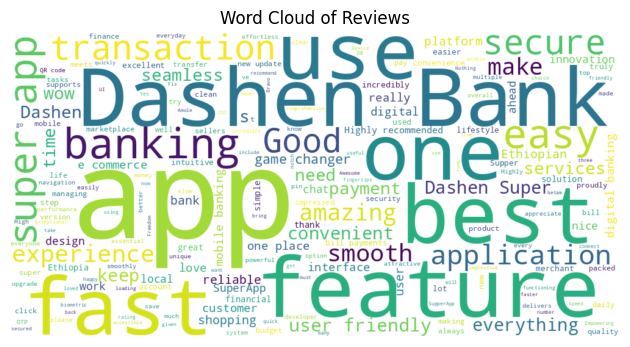

In [174]:
#Plot a word cloud of the reviews
viz.plot_wordcloud()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/rating_distribution.png


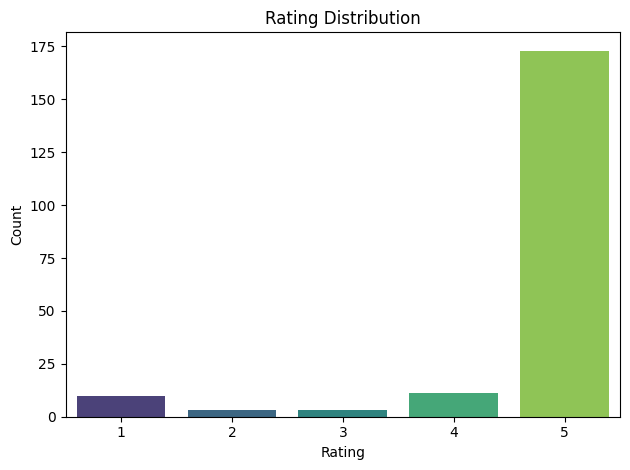

In [175]:
# Plot rating distribution
viz.plot_rating_distribution()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/thumbs_up_vs_rating.png


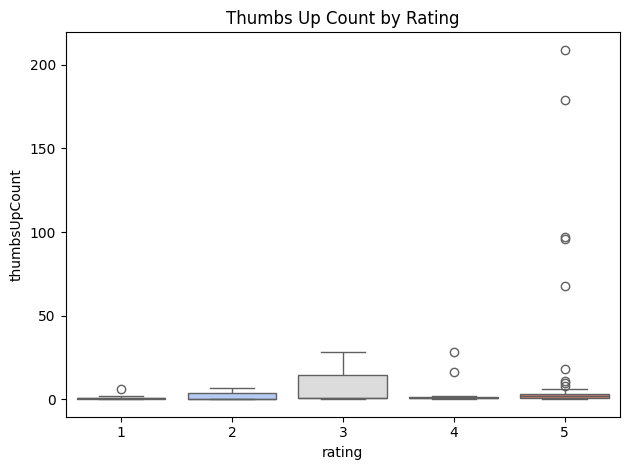

In [176]:
#Plot thumbs up against rating
viz.plot_thumbs_up_vs_rating()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/sentiment_vs_rating.png


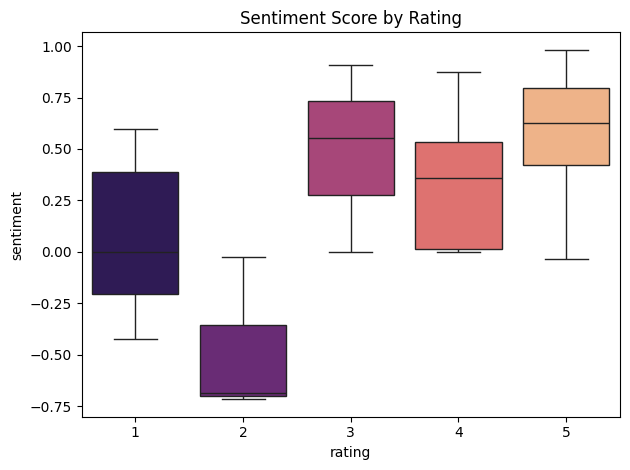

In [177]:
# Plot Sentiment against Ratin
viz.plot_sentiment_vs_rating()

In [178]:
df=dq.drop_columns(['userName','thumbsUpCount'])

[INFO] Dropped columns: ['userName', 'thumbsUpCount']


In [179]:
df.sample(15)

,review,rating,date,bank,source
29,wow,5,2025-05-20 14:32:56,Dashen,Google Store
121,the best Supper App ever,5,2025-04-22 08:16:34,Dashen,Google Store
66,it seems me logging out within minutes,1,2025-05-03 09:43:29,Dashen,Google Store
191,Keep it up!,5,2025-04-21 12:36:01,Dashen,Google Store
113,"""Dashen Super App'' is impressive with its foc...",5,2025-04-22 10:18:12,Dashen,Google Store
82,Its slow when i try to see the Recent Transact...,1,2025-04-28 10:11:58,Dashen,Google Store
64,excellent game changer App,5,2025-05-08 11:07:07,Dashen,Google Store
136,Very convenient,5,2025-04-21 20:12:22,Dashen,Google Store
146,This is what we call banking app. As professio...,5,2025-04-21 17:13:56,Dashen,Google Store
12,ዳሽን ባንክ ይለያል,4,2025-05-28 19:34:49,Dashen,Google Store
